# EDA+ | Exploratory & Statistical Analysis
## Body Performance 

**Dataset** confirmed the grade of performance with age, body fat , weight , some exercise performance data , etc.

Body Performance class : A,B,C,D ( A: best) 

In [38]:
# Recall required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statistics


In [39]:
df=pd.read_csv("bodyPerformance.csv")

## Understanding and Validating the Dataset 


In [40]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [41]:
df.shape

(13393, 12)

In [42]:
df.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

In [43]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

<br><br>


## Descriptive Statistical Analysis

In [44]:
# descriptive statistics for numerical columns 
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [45]:
# Most Frequent value 
df.mode()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,21.0,M,170.0,70.5,23.1,80.0,120.0,43.1,20.0,45.0,211.0,C
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D


In [46]:
# skewness of data 
df[["age","height_cm",	"weight_kg",	"body fat_%",	"diastolic",	"systolic"	,"gripForce",
    "sit and bend forward_cm",	"sit-ups counts",	"broad jump_cm"]].skew()

age                        0.599896
height_cm                 -0.186882
weight_kg                  0.349805
body fat_%                 0.361132
diastolic                 -0.159637
systolic                  -0.048654
gripForce                  0.018456
sit and bend forward_cm    0.785492
sit-ups counts            -0.467830
broad jump_cm             -0.422623
dtype: float64

In [47]:
# categorization and aggregation 
df.groupby(["gender","class"]).agg(["min","max","median"])

age              height_cm               weight_kg         \
               min   max median       min    max median       min    max   
gender class                                                               
F      A      21.0  64.0   28.0     140.5  177.9  161.5      34.5   83.4   
       B      21.0  64.0   32.0     125.0  178.0  160.8      31.9   83.7   
       C      21.0  64.0   38.0     141.0  179.0  160.1      38.1   77.9   
       D      21.0  64.0   44.0     139.5  178.2  159.1      26.3  113.3   
M      A      21.0  64.0   32.0     148.0  191.8  173.0      36.5  101.4   
       B      21.0  64.0   33.0     153.4  191.8  172.7      47.0  111.8   
       C      21.0  64.0   31.0     153.9  193.8  173.4      43.2  103.6   
       D      21.0  64.0   32.0     145.8  192.0  173.3      39.1  138.1   

                    body fat_%  ... gripForce sit and bend forward_cm         \
             median        min  ...    median                     min    max   
gender class                    ...                                            
F      A      55.00        9.4  ...      27.9                    18.2   35.2   
       B      55.40       12.9  ...      26.0                    13.8   34.6   
       C      55.33       12.2  ...      24.5                     9.4   35.2   
       D      59.30        3.5  ...      23.1                   -22.0   35.2   
M      A      71.15        3.0  ...      46.8                    11.8  185.0   
       B      71.83        4.7  ...      44.0                     7.1  213.0   
       C      72.00        3.5  ...      42.1                     2.3   37.0   
       D      77.10        3.5  ...      40.6                   -25.0   30.3   

                    sit-ups counts              broad jump_cm                
             median            min   max median           min    max median  
gender class                                                                 
F      A      23.25           17.0  74.0   42.0          94.0  234.0  172.0  
       B      19.90           12.0  68.0   33.0          71.0  260.0  160.0  
       C      17.10            7.0  61.0   27.0           0.0  234.0  148.0  
       D      12.40            0.0  59.0   17.0           0.0  203.0  134.0  
M      A      18.70           31.0  80.0   54.0          40.0  299.0  230.0  
       B      15.00           25.0  78.0   48.0         132.0  295.0  218.0  
       C      11.80           19.0  71.0   45.0           0.0  303.0  211.0  
       D       5.35            0.0  78.0   36.0           0.0  275.0  198.0  

[8 rows x 30 columns]

<br>

<br><br>


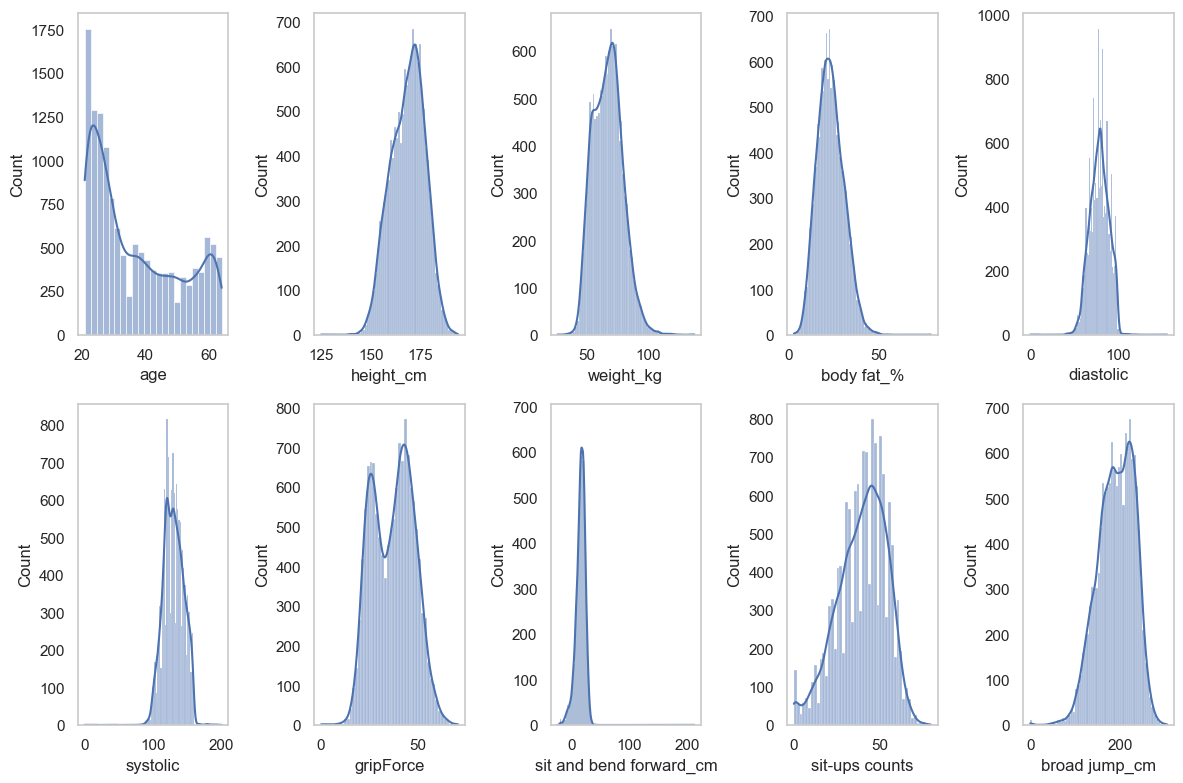

In [48]:
# Data Distribution
r=1
plt.figure(figsize=(12,8))

for i in ["age","height_cm",	"weight_kg",	"body fat_%",	"diastolic",	"systolic"	,"gripForce",	"sit and bend forward_cm",	"sit-ups counts",	"broad jump_cm"]:
    plt.subplot(2,5,r)
    sns.histplot(df[i],kde=True,  edgecolor=None)
    r+=1
    plt.grid()
plt.tight_layout()
plt.show()    

<br><br>


In [49]:
# Exploring Categorical Features

<Axes: xlabel='body fat_%', ylabel='Density'>

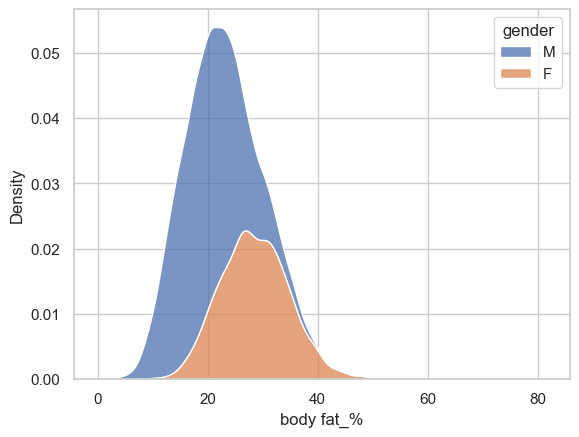

In [50]:
sns.kdeplot(df, x="body fat_%", hue="gender",  multiple="stack")

<Axes: xlabel='weight_kg', ylabel='Density'>

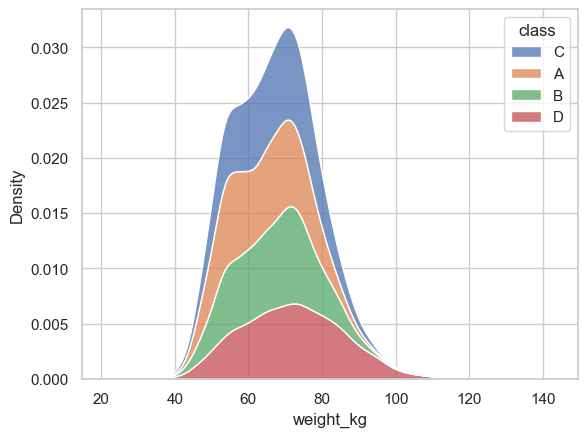

In [51]:
sns.kdeplot(df, x="weight_kg", hue="class",  multiple="stack")

In [52]:
Numeric_features=df[["age","height_cm",	"weight_kg",	"body fat_%",	"diastolic",	"systolic"	,"gripForce",	"sit and bend forward_cm",	"sit-ups counts",	"broad jump_cm"]]

<Figure size 1200x600 with 0 Axes>

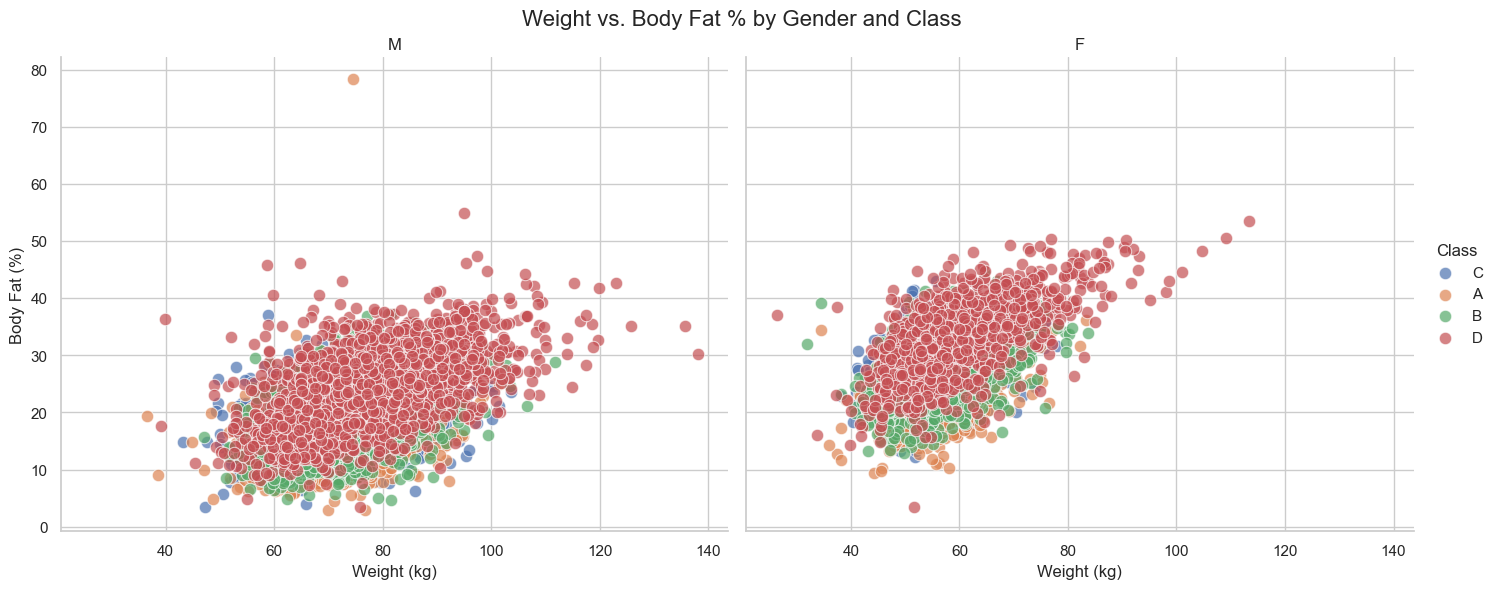

In [53]:
# Set a clean style for the plot
sns.set(style="whitegrid")

# Create the FacetGrid
plt.figure(figsize=(12, 6))  
g = sns.FacetGrid(df, col="gender", hue="class", height=6, aspect=1.2)

# Add scatterplot to the FacetGrid
g.map(sns.scatterplot, "weight_kg", "body fat_%", alpha=0.7, s=80)

# Add titles and labels
g.set_axis_labels("Weight (kg)", "Body Fat (%)")
g.set_titles(col_template="{col_name}")

# Add legend and adjust its position
g.add_legend(title="Class")

# Final adjustments to the plot layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Weight vs. Body Fat % by Gender and Class", fontsize=16)

# Display the plot
plt.show()



In [54]:
# metrics for oulier detection
Numeric_features.kurt()

age                        -1.017671
height_cm                  -0.433053
weight_kg                   0.171606
body fat_%                  0.128712
diastolic                   0.363525
systolic                    0.380285
gripForce                  -0.822200
sit and bend forward_cm    35.220856
sit-ups counts             -0.156326
broad jump_cm               0.002397
dtype: float64



<br><br>





### Inter Quartile Range(IQR) : the spread of the middle half of data distribution.

In [55]:
for i in ["age","height_cm",	"weight_kg",	"body fat_%",	"diastolic",	"systolic"	,"gripForce",	"sit and bend forward_cm",	"sit-ups counts",	"broad jump_cm"]:
    Q1 = df[i].quantile(.25)
    Q3 = df[i].quantile(.75)
    IQR = Q3 - Q1
    print(f"IQR of {i} is : {IQR:0.1f}")    

IQR of age is : 23.0
IQR of height_cm is : 12.4
IQR of weight_kg is : 17.1
IQR of body fat_% is : 10.0
IQR of diastolic is : 15.0
IQR of systolic is : 21.0
IQR of gripForce is : 17.7
IQR of sit and bend forward_cm is : 9.8
IQR of sit-ups counts is : 20.0
IQR of broad jump_cm is : 59.0


In [56]:
# Removing outliers from sit and bend forward_cm columns which has the highest kurts value: 35.22
upper_limit=df["sit and bend forward_cm"].quantile(0.75)+ (1.5 * 9.8)
upper_limit

35.4

In [57]:
df[df["sit and bend forward_cm"]> 35.4 ].shape

(6, 12)

<br><br>

## Inferencial Statisticla Analysis 

In [58]:
import scipy.stats as stats
import numpy as np
data = df["age"]

# Sample mean
mean = np.mean(data)

# Standard error of the mean
std_err = stats.sem(data)

# Confidence Interval (95%)
confidence_interval = stats.norm.interval(0.95, loc=mean, scale=std_err)
print(f"95% Confidence Interval: {confidence_interval}")

# Hypothetical population mean (for example, 20%)
population_mean = 36.8

# Two-sided t-test
t_statistic, p_value_two_sided = stats.ttest_1samp(data, population_mean)
print(f"Two-sided p-value: {p_value_two_sided}")

# One-sided p-value calculations:
# If you are testing if the sample mean is GREATER than the population mean
p_value_one_sided_greater = p_value_two_sided / 2 if t_statistic > 0 else 1 - (p_value_two_sided / 2)
print(f"One-sided p-value (greater): {p_value_one_sided_greater}")

# If you are testing if the sample mean is LESS than the population mean
p_value_one_sided_less = p_value_two_sided / 2 if t_statistic < 0 else 1 - (p_value_two_sided / 2)
print(f"One-sided p-value (less): {p_value_one_sided_less}")


95% Confidence Interval: (36.54434346585151, 37.00586933187864)
Two-sided p-value: 0.8325537670229348
One-sided p-value (greater): 0.5837231164885326
One-sided p-value (less): 0.4162768835114674


<br>

### 95 % CI & p-value Interpretation for a hypothesis with mean = 36.8

**95% Confidence Interval:** (36.54, 37.00)
This interval suggests that you are 95% confident the true mean age of sample lies between 36.54 and 37.00.

**A two-sided p-value of 0.802** indicates there is no statistically significant difference between the sample mean and the hypothetical mean of 36.8

Typically, a p-value < 0.05 would indicate a significant difference. 
Since 0.802 is much larger, you **fail to reject the null hypothesis**. This means there's no strong evidence that the sample mean age is different from 35.8

**A p-value of 0.599** is quite large, indicating weak evidence to support that the sample mean is significantly greater than 36.8

**A p-value of 0.401** suggests there's also weak evidence to claim the sample mean is less than 36.8

<br>

In [59]:
# Select male and female body fat percentages
male_body_fat = df['body fat_%'][df['gender'] == 'M']
female_body_fat = df['body fat_%'][df['gender'] == 'F']

# Independent t-test
t_statistic, p_value = stats.ttest_ind(male_body_fat, female_body_fat)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")


t-statistic: -76.48742318447472
p-value: 0.0


### Independent Samples t-test:

Compares the means of two independent groups (here:  male vs. female body fat %)

**t-statistic: -76.48**
This large negative value indicates that the mean body fat % of males is much lower than that of females.

this difference is **highly significant (p = 0.0)**

In [61]:
from scipy.stats import f_oneway

class1 = df['weight_kg']
class2 = df['body fat_%']
class3 = df['sit-ups counts']

# One-Way ANOVA comparing the means of these three groups
print(f_oneway(class1, class2, class3))



F_onewayResult(statistic=50205.485172216446, pvalue=0.0)


### ANOVA 

The **F-statistic** measures the ratio of:
Variance between the groups (how much the group means differ)
Variance within the groups (random variation within each group)

A higher F-statistic (like 50205.49) suggests that the group means are very different relative to the variation within each group.

**p-value** of 0.0 Means at least one of the groups has a mean that is significantly different from the others.